# Realiza las siguientes importaciones.


```python
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import os
```



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

# Lectura del archivo:

```python
path = '/content/drive/MyDrive/UPGRADE_HUB_BOOTCAMP/DATA/' 
# cambia tu path por el de tu drive o ruta en el ordenador

nombre_archivo = 'madfhantr.csv'

data = pd.read_csv(os.path.join(path, nombre_archivo))
```

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
data = pd.read_csv('/content/drive/MyDrive/Ejercicios_sns/madfhantr.csv')
nombre_archivo = 'madfhantr.csv'

#data = pd.read_csv(os.path.join(path, nombre_archivo))

1.   Obtén el número de valores faltantes por columna, buscamos el siguiente Output:

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
data.apply(lambda x: x.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# 2. Obtén una lista con los nombres de dichas columnas. (No vale hardcodear).

In [19]:
data.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

3. Obtén una Serie de tipos:

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


4. Selecciona aquellas columnas donde la desviación típica sea mayor que 1. 

In [22]:
data.describe().T['std']

ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             85.587325
Loan_Amount_Term       65.120410
Credit_History          0.364878
Name: std, dtype: float64

## ejercicios resueltos:



1.

In [24]:
s = data.isna().sum().sort_values(ascending = False)
s[s > 0]

Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64

2.

In [25]:
s = data.isna().sum().sort_values(ascending = False)
lista_valores_faltantes = s[s > 0].index.to_list()
lista_valores_faltantes

['Credit_History',
 'Self_Employed',
 'LoanAmount',
 'Dependents',
 'Loan_Amount_Term',
 'Gender',
 'Married']

3.

In [26]:
data[lista_valores_faltantes].dtypes

Credit_History      float64
Self_Employed        object
LoanAmount          float64
Dependents           object
Loan_Amount_Term    float64
Gender               object
Married              object
dtype: object

4.

In [27]:
s2 = data[lista_valores_faltantes].describe().T['std']
s2[s2 > 1].index.to_list()

['LoanAmount', 'Loan_Amount_Term']

5.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


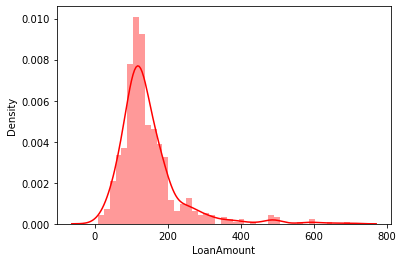

In [35]:
sns.distplot(data["LoanAmount"], color = "r")

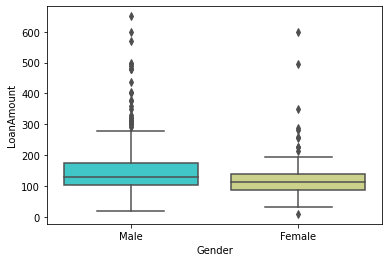

In [39]:
sns.boxplot(x="Gender", y="LoanAmount", data=data ,palette='rainbow')

## Solución de Luis!!

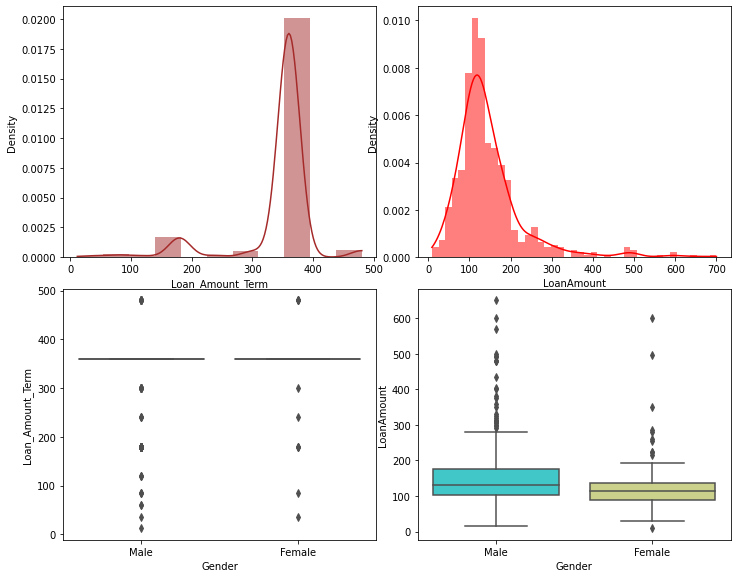

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
fig.tight_layout()
sns.boxplot(x="Gender", y="Loan_Amount_Term", data=data,palette='rainbow', ax = axes[1][0])
sns.boxplot(x="Gender", y="LoanAmount", data=data,palette='rainbow')
sns.histplot(data['LoanAmount'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0, ax = axes[0][1])
sns.histplot(data['Loan_Amount_Term'], color="brown", label="100% Equities", kde=True, stat="density", linewidth=0, ax = axes[0][0])

## Trabajo con NA´s 


---



1.   Obtén el número de valores faltantes por columna, buscamos el siguiente Output:
```
Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64
```
2.   Obtén una lista con los nombres de dichas columnas. (No vale hardcodear).
```
[
    'Credit_History',
    'Self_Employed',
    'LoanAmount',
    'Dependents',
    'Loan_Amount_Term',
    'Gender',
    'Married'
 ]
```
3. Obtén una Serie de tipos:
```
Credit_History      float64
Self_Employed        object
LoanAmount          float64
Dependents           object
Loan_Amount_Term    float64
Gender               object
Married              object
dtype: object
```

4. Selecciona aquellas columnas donde la desviación típica sea mayor que 1. Deberás obtener lo siguiente:
```
['LoanAmount', 'Loan_Amount_Term']
```

5. Estudia el comportamiento de dichas variables (**Matemática y gráficamente**). ¿Se podría aplicar alguna transformación? En caso de ser así, ¿Cuál y por qué?. Piense bien a qué variable aplicar qué transformación. 

* Realice la siguiente gráfica e interprétela, para ello, use los contenidos vistos en la clase de `Seaborn` y `Matplotlib`.

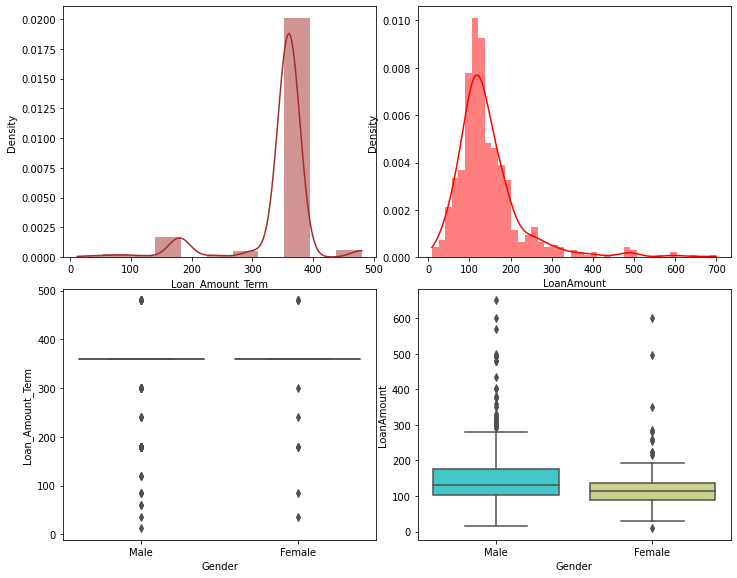


Antes de nada, aplique la función que se programó el día anterior, que permitía llevar los Outliers a los límites inferiores y superiores de la variable, de manera que el comportamiento de la variable se resuma en:
$$
[Q1 - 1.5 ICR, \ Q3 + 1.5ICR]
$$

```python
def detectar_outliers(data: pd.DataFrame, columnas_limpiar: list) -> pd.DataFrame:
    """Esta función recibe un dataframe y una serie de columnas 
    sobre las que se quiere hacer un tratamiento de las variables
    de tipo numérico.

    Args:
        data (pd.DataFrame): Dataframe sobre el que se quiere hacer el tratamiento.
        columnas_limpiar list[str]: lista de strings con las columnas que se quieren limpiar.

    Returns:
        pd.DataFrame: Dataframe con las columnas limpias.
        
    Usage:
    
    >>> df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [1, 2, 3, 4, 5]})
    >>> detectar_outliers(df, ['A', 'B'])
    """
    import numpy as np
    
    try:

        assert(any(data[columnas_limpiar].dtypes.values != 'float64') == False)
        
        for variable in columnas_limpiar:
            
            # calcula Q1 y Q3.
            Q1 = data[variable].quantile(0.25)
            Q3 = data[variable].quantile(0.75)
            
            # Rango Intercuartíl.
            IQR = Q3 - Q1
            
            # calcula los límites de los outliers.
            upper_limit = Q3+1.5*IQR
            lower_limit = Q1-1.5*IQR
            
            # Genera un vector con los nuevos valores de la variable.
            eliminar_outliers = np.where(
                data[variable] > upper_limit, upper_limit,
                    np.where(
                        data[variable] < lower_limit, lower_limit, data[variable]
                            )
                    )
            
            # Reemplaza los valores de la variable por los nuevos.
            data[variable] = eliminar_outliers
            
    except:
        
        raise Exception('Alguna variable no es de tipo float.')
```
Aplique esta función a las columnas numéricas que considere.


6. Obtén la siguiente gráfica:

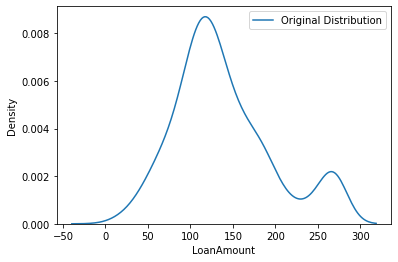


7. Prueba a graficar diversas imputaciones de datos, ¿Cuál se ajusta mejor a la distribución original? Imputa la variable mediante dicha imputación.

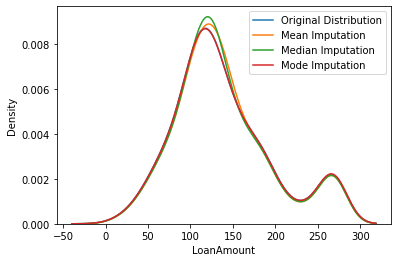


> Lea la documentación del siguiente imputer (KNN Imputer) https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

> ¿Se le ocurre alguna forma que permita gráficar la imputación por el algoritmo de KNN conforme vamos variando el número de vecinos?


In [40]:
data['LoanAmount'] = np.log1p(data['LoanAmount'])

### 6. 

In [41]:
import numpy as np

### Ejercicio FIFA

In [42]:
fifa = pd.read_csv('/content/drive/MyDrive/Ejercicios_sns/fifa19_prep.csv')

In [43]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1000 non-null   int64  
 1   Name                      1000 non-null   object 
 2   Age                       1000 non-null   int64  
 3   Nationality               1000 non-null   object 
 4   Overall                   1000 non-null   int64  
 5   Potential                 1000 non-null   int64  
 6   Club                      1000 non-null   object 
 7   Value                     1000 non-null   float64
 8   Wage                      1000 non-null   int64  
 9   Special                   1000 non-null   int64  
 10  Preferred Foot            1000 non-null   object 
 11  International Reputation  1000 non-null   float64
 12  Weak Foot                 1000 non-null   float64
 13  Skill Moves               1000 non-null   float64
 14  Work Rate

In [44]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Value Forward,Value Middle,Value Defense,Value Goalkeeper
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565000,2202,...,11.0,15.0,14.0,8.0,€226.5M,La liga,92.875,91.125,59.0,10.8
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,405000,2228,...,11.0,15.0,14.0,11.0,€127.1M,Serie A,93.125,88.375,62.4,11.6
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290000,2143,...,9.0,15.0,15.0,11.0,€228.1M,French League 1,90.125,88.750,60.1,11.8
3,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,355000,2281,...,13.0,5.0,10.0,13.0,€196.4M,Premier League,88.125,90.625,75.9,11.2
4,183277,E. Hazard,27,Belgium,91,91,Chelsea,93.0,340000,2142,...,12.0,6.0,8.0,8.0,€172.1M,Premier League,89.375,89.375,61.8,9.0


In [45]:
fifa.isnull().sum()

ID                           0
Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                         0
Value                        0
Wage                         0
Special                      0
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Body Type                    0
Position                     0
Height                       0
Weight                       0
Crossing                     0
Finishing                    0
HeadingAccuracy              0
ShortPassing                 0
Volleys                      0
Dribbling                    0
Curve                        0
FKAccuracy                   0
LongPassing                  0
BallControl                  0
Acceleration                 0
SprintSpeed                  0
Agility                      0
Reaction